# Интерполяция параметрически заданной функции

Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Нарисуем букву S и измерим координаты восьми точек на ней

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from math import ceil, floor
%matplotlib inline

In [57]:
x = np.array([-4.5, 0, 4.5, 2, -2, -4.5, 0, 4.5])
y = np.array([-3.5, -4.5, -3.5, -1, 1, 3.5, 4.5, 3.5])


Изобразим полученные начальные данные. Заметены очертания буквы S:


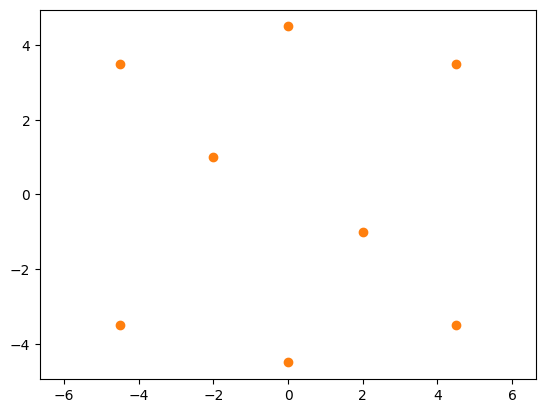

In [58]:
plt.axis("equal")
plt.plot(x, y, 'o', color='tab:orange')
pass

## Первый способ

Рассмотрим два набора данных $(i, x_i)$ и $(i, y_i)$ ($i=1,\dots,n$).
Их можно независимо интерполировать функциями $f(t)$, $g(t)$. Тогда кривая,
заданная параметрически,
$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$
будет интерполировать наши данные.

Подготовим массив индексов i и linspace для построения графика

In [59]:
i = np.array(list(range(1,9)))
t = np.linspace(1, 8, 500)

Интерполируем полученные данные **кубическим интерполянтом**

In [60]:
f = np.polyfit(i, x, 3)
g = np.polyfit(i, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

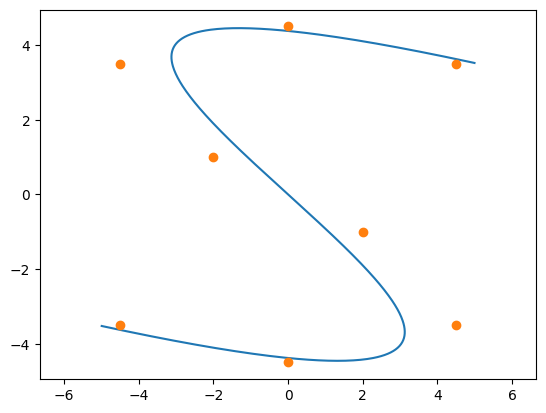

In [61]:
plt.axis("equal")
plt.plot(xx, yy, color="tab:blue")
plt.plot(x, y, 'o', color='tab:orange')
pass

На графике появилась буква S. Однако, сильно отдалённая от изначальных точек.

Теперь интерполируем полученные данные **кубическим сплайном**

In [62]:
f = interpolate.interp1d(i, x, kind='cubic')
g = interpolate.interp1d(i, y, kind='cubic')
xx = f(t)
yy = g(t)

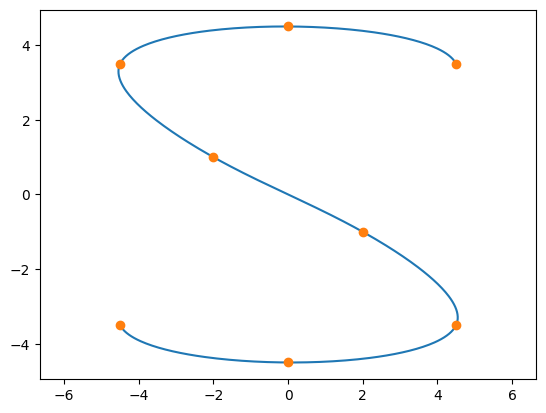

In [63]:
plt.axis("equal")
plt.plot(xx, yy, color="tab:blue")
plt.plot(x, y, 'o', color='tab:orange')
pass

## Второй способ

Другой способ – интерполировать данные $(\sum_{i=1}^{i-1} d_i, x_i)$
и $(\sum_{i=1}^{i-1} d_i, y_i)$ ($i=1,\dots,n$), где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$.

Создадим массив расстояний между точками:

In [64]:
dist = lambda i: np.sqrt((x[i + 1] - x[i]) ** 2 + (y[i + 1] - y[i]) ** 2)

d = np.array(list(dist(i) for i in range(len(x)-1)))

d

array([4.60977223, 4.60977223, 3.53553391, 4.47213595, 3.53553391,
       4.60977223, 4.60977223])

Массив $d_i$ - массив необходимых сумм расстояний между точками

In [65]:
di = np.array([])

for j in range(len(x)):
    s = sum(d[i] for i in range(j))
    di = np.append(di, s)
    
di

array([ 0.        ,  4.60977223,  9.21954446, 12.75507836, 17.22721432,
       20.76274822, 25.37252045, 29.98229268])

Изменим linspace в соответствии с массивом $d_i$ для корректного постороения

In [66]:
t = np.linspace(min(di), max(di), 500)

Интерполируем полученные данные **кубическим интерполянтом** 

In [67]:
f = np.polyfit(di, x, 3)
g = np.polyfit(di, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

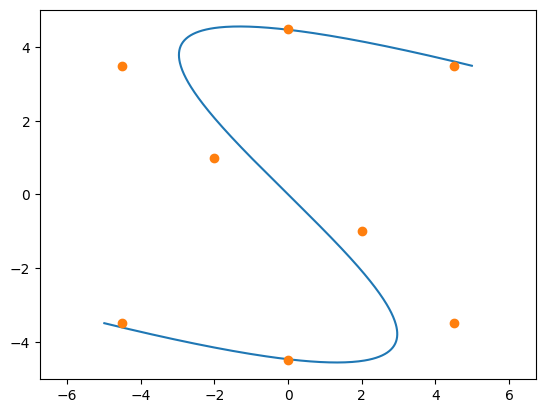

In [68]:
plt.axis("equal")
plt.plot(xx, yy, color="tab:blue")
plt.plot(x, y, 'o', color='tab:orange')
pass

Результат похож на первый способ. Буква S видна, но находится на удалении от точек.

Теперь интерполируем полученные данные **кубическим сплайном**

In [69]:
f = interpolate.interp1d(di, x, kind='cubic')
g = interpolate.interp1d(di, y, kind='cubic')
xx = f(t)
yy = g(t)

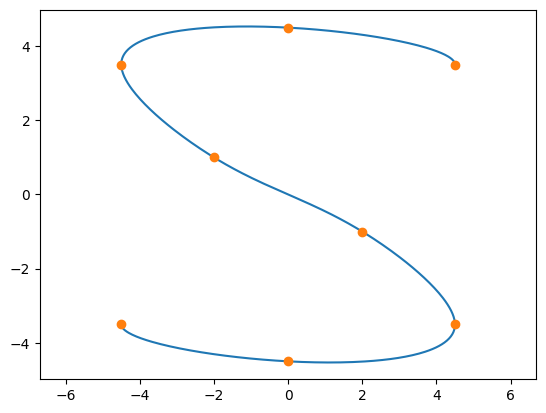

In [70]:
plt.axis("equal")
plt.plot(xx, yy, color="tab:blue")
plt.plot(x, y, 'o', color='tab:orange')
pass

## Выводы



По полученным данным можно сделать ряд выводов:
1. Существенных отличий в полученных результатах первым и вторым методом нет, оба варианта при определенной интерполяции дают почти неотличимый результат
2. Интерполяция кубическим интерполянтом и кубическим сплайном дают относительно различные результаты. Кубический интерполянт получается гладким, но отдаленным от заданных точек . Кубический сплайн же отражает наиболее четкую картину, отображая результат, масимально приближенный к реальности.